### author: zabiralnazi@yahoo.com
> TL, DCNN as feature extractor, feature concatenation, comparison with different classifiers

In [0]:
## data_seg.zip URL: https://drive.google.com/open?id=15Bav4EU2fEKMB76zerubFNIUkJjqy7V2

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
% cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
import os
print(os.stat('/content/drive/My Drive/data_seg.zip').st_size/1000000000) # GigaBytes (approx)

0.019925205


In [0]:
% cd /content/

/content


In [0]:
! ls

drive  sample_data


In [0]:
# unzip to train_imgs folder
data_seg = '/content/drive/My Drive/data_seg.zip'
import zipfile
zip_ref = zipfile.ZipFile(data_seg, 'r')
zip_ref.extractall('img_seg')
zip_ref.close()

In [0]:
! ls

drive  img_seg	sample_data


In [0]:
% cd /content/img_seg/data_seg

/content/img_seg/data_seg


In [0]:
! ls

test  train


In [0]:
import os
print(os.stat('/content/drive/My Drive/label_dict.npy').st_size/1000000000) # GigaBytes (approx)

2.724e-06


In [0]:
import numpy as np
label_dict = np.load('/content/drive/My Drive/label_dict.npy')
print(label_dict)
print(type(label_dict))
print(label_dict.item().get('003'))

{'003': 0, '009': 0, '016': 0, '022': 0, '024': 0, '025': 0, '035': 0, '038': 0, '042': 0, '044': 0, '045': 0, '050': 0, '092': 0, '101': 0, '103': 0, '112': 0, '118': 0, '125': 0, '132': 0, '134': 0, '135': 0, '144': 0, '146': 0, '147': 0, '150': 0, '152': 0, '156': 0, '159': 0, '161': 0, '162': 0, '175': 0, '177': 0, '182': 0, '198': 0, '200': 0, '010': 0, '017': 0, '020': 0, '039': 0, '041': 0, '105': 0, '107': 0, '108': 0, '133': 0, '142': 0, '143': 0, '160': 0, '173': 0, '176': 0, '196': 0, '197': 0, '199': 0, '203': 0, '204': 0, '206': 0, '207': 0, '208': 0, '364': 0, '365': 0, '367': 0, '371': 0, '372': 0, '374': 0, '375': 0, '378': 0, '379': 0, '380': 0, '381': 0, '383': 0, '384': 0, '385': 0, '389': 0, '390': 0, '392': 0, '394': 0, '395': 0, '397': 0, '399': 0, '400': 0, '402': 0, '002': 1, '004': 1, '013': 1, '015': 1, '019': 1, '021': 1, '027': 1, '030': 1, '032': 1, '033': 1, '037': 1, '040': 1, '043': 1, '047': 1, '048': 1, '049': 1, '057': 1, '075': 1, '076': 1, '078': 1,

In [0]:
import glob
img_files_tv = [] # train, validation
for files in glob.glob('/content/img_seg/data_seg/train/image/*.png'):
    img_files_tv.append(files)

mask_files_tv = []
for files in glob.glob('/content/img_seg/data_seg/train/label/*.png'):
    mask_files_tv.append(files)

In [0]:
print(len(img_files_tv))
print(len(mask_files_tv))

170
170


In [0]:
img_files_tst = [] # train, validation
for files in glob.glob('/content/img_seg/data_seg/test/image/*.png'):
    img_files_tst.append(files)

mask_files_tst = []
for files in glob.glob('/content/img_seg/data_seg/test/label/*.png'):
    mask_files_tst.append(files)

In [0]:
print(len(img_files_tst))
print(len(mask_files_tst))

30
30


In [0]:
# To reproduce the results later
from numpy.random import seed
seed(1997)
from tensorflow import set_random_seed
set_random_seed(1997)

In [0]:
import cv2
import random
import numpy as np
import pandas as pd


img_files_tv.sort()
mask_files_tv.sort()

img_files_tst.sort()
mask_files_tst.sort()

img_arr = []
mask_arr = []
labels = []
num_train = len(img_files_tv)
print(num_train)

170


In [0]:
img_files_tv[0][-7:-4]

'002'

In [0]:
import random
random.seed(1997) # same seed again
for i in range(num_train):
    a = cv2.imread(img_files_tv[i])
    #a = cv2.resize(a, (224, 224)) 
    img_id = img_files_tv[i][-7:-4]
    a = np.array(a,dtype=np.uint8)
    img_arr.append(a)

    b = cv2.imread(mask_files_tv[i],0)
    #b = cv2.resize(b, (224, 224)) 
    b = np.array(b,dtype=np.uint8)
    mask_arr.append(b)
    
    labels.append(label_dict.item().get(img_id))
    
    
for i in range(len(img_files_tst)):
    a = cv2.imread(img_files_tst[i])
    #a = cv2.resize(a, (224, 224)) 
    img_id = img_files_tst[i][-7:-4]
    a = np.array(a,dtype=np.uint8)
    img_arr.append(a)

    b = cv2.imread(mask_files_tst[i],0)
    #b = cv2.resize(b, (224, 224)) 
    b = np.array(b,dtype=np.uint8)
    mask_arr.append(b)
    labels.append(label_dict.item().get(img_id))
    
print(len(img_arr))
print(len(mask_arr))
print(len(labels))

gen_batch = 0

fin_arr = list(zip(img_arr,mask_arr,labels))
random.shuffle(fin_arr)
img_arr = [x[0] for x in fin_arr]
mask_arr = [x[1] for x in fin_arr]
labels = [x[2] for x in fin_arr]

200
200
200


In [0]:
print(labels)
print(img_arr[0].shape)
print(mask_arr[0].shape)

[1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2]
(224, 224, 3)
(224, 224)


In [0]:
img_arr[0].shape

(224, 224, 3)

In [0]:
mask_arr[0].shape

(224, 224)

In [0]:
type(img_arr[0][0,0,0])

numpy.uint8

In [0]:
type(mask_arr[0][0,0])

numpy.uint8

In [0]:
overlay_img = cv2.bitwise_and(img_arr[5], img_arr[5], mask = mask_arr[5])

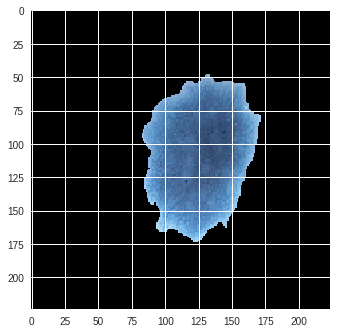

In [0]:
import matplotlib.pyplot as plt
plt.imshow(overlay_img)
plt.show()

In [0]:
# print(overlay_img)
(x, y, z_) = np.where(overlay_img > 0)
print(np.min(x))
print(np.max(x))
print(np.min(y))
print(np.max(y))

48
173
83
171


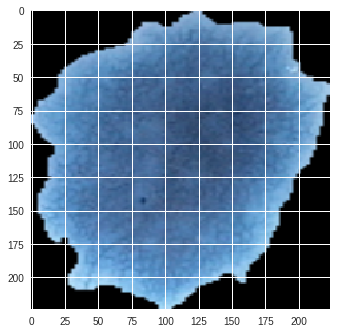

In [0]:
crop_img = overlay_img[48:174,83:172,:]
crop_img_r = cv2.resize(crop_img, (224,224))
plt.imshow(crop_img_r)
plt.show()

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

x = crop_img_r
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = np.array(x, dtype='float64')
x = preprocess_input(x)

features = model.predict(x)
print(features.shape)

Using TensorFlow backend.


58892288/58889256 [==============================] - 2s 0us/step
(224, 224, 3)
(1, 224, 224, 3)
(1, 7, 7, 512)


In [0]:
a_f = features.flatten()

In [0]:
print(a_f.shape)

(25088,)


In [0]:
def img_process(img, mask):
  overlay_img = cv2.bitwise_and(img, img, mask = mask)
  (x, y, z_) = np.where(overlay_img > 0)
  mnx = (np.min(x))
  mxx = (np.max(x))
  mny = (np.min(y))
  mxy = (np.max(y))
  crop_img = overlay_img[mnx:mxx,mny:mxy,:]
  crop_img_r = cv2.resize(crop_img, (224,224))
  return crop_img_r

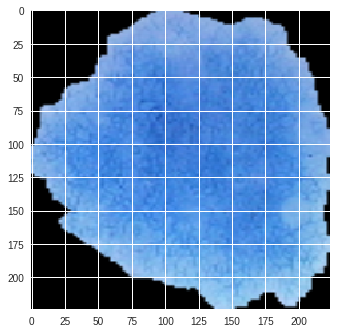

In [0]:
a = img_process(img_arr[123], mask_arr[123])
plt.imshow(a)
plt.show()

In [0]:
def extract_features(model, img):
  x = img
  # print(x.shape)
  x = np.expand_dims(x, axis=0)
  # print(x.shape)
  x = np.array(x, dtype='float64')
  x = preprocess_input(x)

  features = model.predict(x)
  features = features.flatten()
  return features

In [0]:
extract_features(model,a).shape

(25088,)

In [0]:
def generate_feature_vec(model):
  X = []
  y = labels

  for i in range(len(img_arr)):
    img = img_arr[i]
    mask = mask_arr[i]
    overlay_crop_r = img_process(img, mask)
    f_set = extract_features(model, overlay_crop_r)
    X.append(f_set)
    
  return (X,y)

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)
(X_vgg16, y) = generate_feature_vec(model)
print(len(X_vgg16))
print(X_vgg16[0].shape)
print(len(y))

200
(25088,)
200


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_vgg16)

print(scaler.mean_)


X = scaler.transform(X_vgg16)


[0.08661335 0.         7.13118579 ... 0.         3.46471557 0.89670552]


In [0]:
print(np.mean(X))
print(np.var(X))

-3.1947233973907567e-18
0.8817362882653061


In [0]:
for i in range(len(y)):
  if y[i] == 1:
    y[i] = 0
for i in range(len(y)):
  if y[i] == 2:
    y[i] = 1
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [0]:
c0 = 0
c1 = 0
for i in range(len(y)):
  if y[i] == 0:
    c0 += 1
for i in range(len(y)):
  if y[i] == 1:
    c1 += 1
print(c0, ' ', c1)

160   40


In [0]:
class_weight = {0:0.25, 1:0.75}

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, class_weight = class_weight)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.8949999999999999 0.11357816691600543


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0, class_weight = class_weight)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.8550000000000001 0.10440306508910546


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=70, weights = 'distance', p=1, leaf_size=1)

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print('Accuracy: ', scores.mean(), scores.std() * 2)

[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
Accuracy:  0.8 0.0


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.8150000000000001 0.11874342087037917


In [0]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.8850000000000001 0.13453624047073706


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.915 0.1268857754044952


In [0]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input

model = InceptionResNetV2(weights='imagenet', include_top=False)
(X_incres2, y) = generate_feature_vec(model)
print(len(X_incres2))
print(X_incres2[0].shape)
print(len(y))

219062272/219055592 [==============================] - 7s 0us/step
200
(38400,)
200


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_incres2)

print(scaler.mean_)


X = scaler.transform(X_incres2)

[0.45715791 0.24072786 0.24614046 ... 0.21584713 0.25599666 0.25358778]


In [0]:
print(np.mean(X))
print(np.var(X))

-5.625129991434126e-19
0.9999999999999991


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, class_weight = class_weight)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.9049999999999999 0.11357816691600543


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0, class_weight = class_weight)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.8200000000000001 0.10198039027185571


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=70, weights = 'distance', p=1, leaf_size=1)

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print('Accuracy: ', scores.mean(), scores.std() * 2)

[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
Accuracy:  0.8 0.0


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.82 0.17435595774162696


In [0]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.875 0.10246950765959595


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

Accuracy:  0.875 0.09219544457292884


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

model = ResNet50(weights='imagenet', include_top=False)
(X_res50, y) = generate_feature_vec(model)
print(len(X_res50))
print(X_res50[0].shape)
print(len(y))

200
(2048,)
200


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_res50)

print(scaler.mean_)


X = scaler.transform(X_res50)

[2.6004379  0.3997941  0.47288282 ... 0.10233943 0.15384562 2.25434253]


In [0]:
print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, class_weight = class_weight)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0, class_weight = class_weight)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn import tree
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)


from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

2.498001805406602e-18
1.0
Accuracy:  0.9099999999999999 0.10770329614269007
Accuracy:  0.85 0.1095445115010332
Accuracy:  0.8450000000000001 0.15132745950421556
Accuracy:  0.9 0.14832396974191325
Accuracy:  0.8799999999999999 0.17435595774162696


In [0]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input

model = VGG19(weights='imagenet', include_top=False)
(X_vgg19, y) = generate_feature_vec(model)
print(len(X_vgg19))
print(X_vgg19[0].shape)
print(len(y))

80142336/80134624 [==============================] - 3s 0us/step
200
(25088,)
200


In [0]:
print('nabil')

nabil


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_vgg19)

print(scaler.mean_)

X = scaler.transform(X_vgg19)

print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, class_weight = class_weight)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0, class_weight = class_weight)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn import tree
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)


from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

[0.04617819 0.         3.80703191 ... 0.         0.14583112 0.25908767]
-7.250436079184696e-19
0.8730468749999998
Accuracy:  0.9000000000000001 0.11832159566199228
Accuracy:  0.8550000000000001 0.094339811320566
Accuracy:  0.775 0.21563858652847825
Accuracy:  0.905 0.12999999999999998
Accuracy:  0.86 0.10770329614269007


In [0]:
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input

model = Xception(weights='imagenet', include_top=False)
(X_x, y) = generate_feature_vec(model)
print(len(X_x))
print(X_x[0].shape)
print(len(y))

83689472/83683744 [==============================] - 3s 0us/step
200
(100352,)
200


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_x)

print(scaler.mean_)

X = scaler.transform(X_x)

print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, class_weight = class_weight)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0, class_weight = class_weight)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn import tree
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)


from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

[0.00223656 0.00273003 0.00081848 ... 0.32296943 0.37922437 0.33682621]
2.9001744316738784e-18
0.9921376753826545
Accuracy:  0.885 0.10049875621120886
Accuracy:  0.8550000000000001 0.122065556157337
Accuracy:  0.7899999999999999 0.12489995996796796
Accuracy:  0.86 0.12489995996796795
Accuracy:  0.8150000000000001 0.16763054614240208


In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

model = InceptionV3(weights='imagenet', include_top=False)
(X_inc3, y) = generate_feature_vec(model)
print(len(X_inc3))
print(X_inc3[0].shape)
print(len(y))

87916544/87910968 [==============================] - 4s 0us/step
200
(51200,)
200


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_inc3)

print(scaler.mean_)

X = scaler.transform(X_inc3)

print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, class_weight = class_weight)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0, class_weight = class_weight)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn import tree
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)


from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

[0.16593921 0.02876234 0.03965574 ... 0.87909791 1.38054225 0.30340776]
2.9753977059954196e-18
1.0000000000000009
Accuracy:  0.8949999999999999 0.12206555615733701
Accuracy:  0.8099999999999999 0.09797958971132713
Accuracy:  0.78 0.18
Accuracy:  0.86 0.15362291495737213
Accuracy:  0.8250000000000002 0.12041594578792297


In [0]:
from keras.applications.densenet import DenseNet201
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input

model = DenseNet201(weights='imagenet', include_top=False)
(X_d, y) = generate_feature_vec(model)
print(len(X_d))
print(X_d[0].shape)
print(len(y))

76398592/76391848 [==============================] - 3s 0us/step
200
(94080,)
200


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_d)

print(scaler.mean_)

X = scaler.transform(X_d)

print(np.mean(X))
print(np.var(X))

from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, class_weight = class_weight)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0, class_weight = class_weight)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)



from sklearn import tree
clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)


from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: ', scores.mean(), scores.std() * 2)

[-9.51864998e-05  3.55345527e-03  8.66860743e-03 ...  4.27639772e-01
  4.37626430e-01  2.73508079e-01]
1.522591576628786e-18
1.0000000000000002
Accuracy:  0.9200000000000002 0.142828568570857
Accuracy:  0.8350000000000002 0.10049875621120889
Accuracy:  0.825 0.12845232578665128
Accuracy:  0.9099999999999999 0.13266499161421597
Accuracy:  0.835 0.16155494421403516
